# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Imoport Dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\User\Downloads\MajorProject(1)\datasets_9109_12699_german_credit_data (1).csv')
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Data Visualization

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.isnull().any().any()

True

In [5]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Taking Care of Missing Data

In [8]:
dataset['Saving accounts'] = dataset['Saving accounts'].fillna('UNK')
dataset['Checking account'] = dataset['Checking account'].fillna('UNK')

In [9]:
dataset.isnull().any().any()

False

In [10]:
dataset.groupby('Purpose').size()

Purpose
business                97
car                    337
domestic appliances     12
education               59
furniture/equipment    181
radio/TV               280
repairs                 22
vacation/others         12
dtype: int64

In [11]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,UNK,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,UNK,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,UNK,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,UNK,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [12]:
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,UNK,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,UNK,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,UNK,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,UNK,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Encoding

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
dataset.shape

(1000, 10)

In [15]:
x=dataset.iloc[:,0:9].values
x

array([[67, 'male', 2, ..., 1169, 6, 'radio/TV'],
       [22, 'female', 2, ..., 5951, 48, 'radio/TV'],
       [49, 'male', 1, ..., 2096, 12, 'education'],
       ...,
       [38, 'male', 2, ..., 804, 12, 'radio/TV'],
       [23, 'male', 2, ..., 1845, 45, 'radio/TV'],
       [27, 'male', 2, ..., 4576, 45, 'car']], dtype=object)

In [16]:
y=dataset.iloc[:,-1].values
y

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

In [17]:
x[0]

array([67, 'male', 2, 'own', 'UNK', 'little', 1169, 6, 'radio/TV'],
      dtype=object)

In [18]:
ct=ColumnTransformer([("on", OneHotEncoder(), [1,3,4,5,8])], remainder = "passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 2, 1169, 6],
       [1.0, 0.0, 0.0, ..., 2, 5951, 48],
       [0.0, 1.0, 0.0, ..., 1, 2096, 12],
       ...,
       [0.0, 1.0, 0.0, ..., 2, 804, 12],
       [0.0, 1.0, 1.0, ..., 2, 1845, 45],
       [0.0, 1.0, 0.0, ..., 2, 4576, 45]], dtype=object)

In [19]:
x[0]

array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67, 2, 1169, 6],
      dtype=object)

In [20]:
import joblib
joblib.dump(ct,"transsformer")

['transsformer']

In [21]:
x[0]

array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67, 2, 1169, 6],
      dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [23]:
y=lb.fit_transform(y)
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

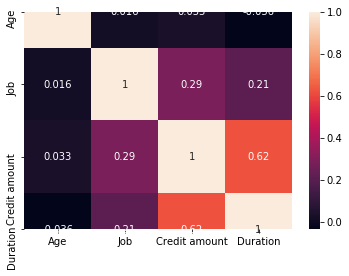

In [24]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

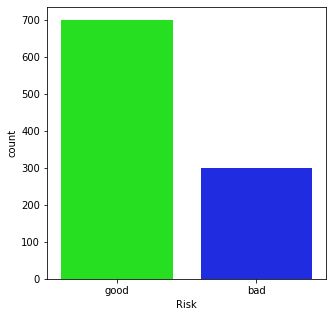

In [25]:
plt.rcParams['figure.figsize']=(5,5)
sns.countplot(dataset['Risk'],palette='hsv')

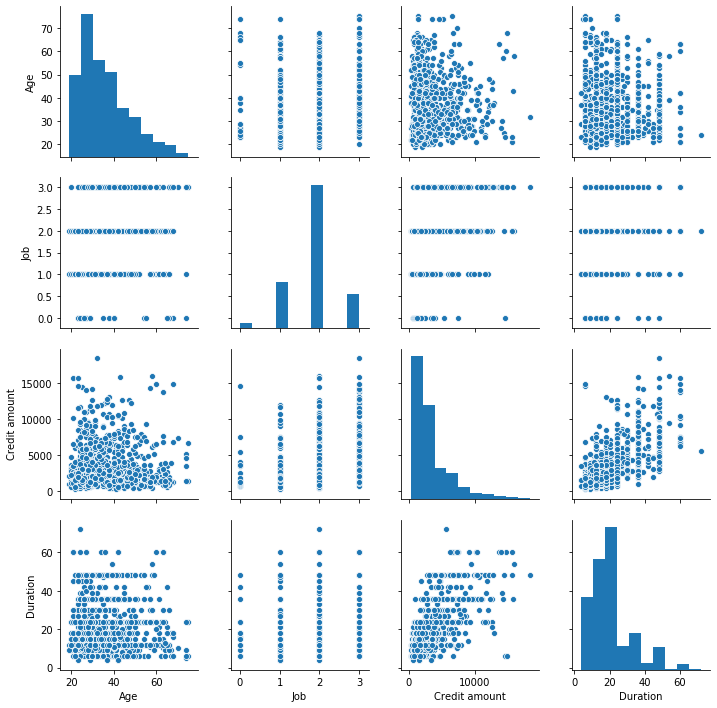

In [26]:
sns.pairplot(dataset.iloc[:,0:])

In [27]:
#Normalization using standard scalar
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.67028006,  0.67028006, -0.3479601 , ...,  0.14694918,
        -0.74513141, -1.23647786],
       [ 1.49191369, -1.49191369, -0.3479601 , ...,  0.14694918,
         0.94981679,  2.24819436],
       [-0.67028006,  0.67028006, -0.3479601 , ..., -1.38377145,
        -0.41656241, -0.73866754],
       ...,
       [-0.67028006,  0.67028006, -0.3479601 , ...,  0.14694918,
        -0.87450324, -0.73866754],
       [-0.67028006,  0.67028006,  2.8738927 , ...,  0.14694918,
        -0.50552769,  1.9992892 ],
       [-0.67028006,  0.67028006, -0.3479601 , ...,  0.14694918,
         0.46245715,  1.9992892 ]])

# Test Train and Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [31]:
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [33]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.74

In [35]:
import joblib
joblib.dump(lr,"lrtest.save")

['lrtest.save']

# Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 26,  32],
       [ 20, 122]], dtype=int64)

In [38]:
import sklearn.metrics as metrics

In [39]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

In [40]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.6537153958232151

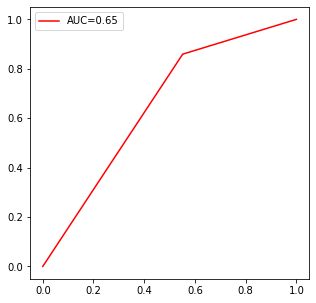

In [41]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='r')
plt.legend()

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8243243243243243